1 - Veriye İlk Bakış

In [1]:
import seaborn as sns                       # Kütüphanemizi import ediyoruz.
planets = sns.load_dataset("planets")       # Hazır seaborn kütüphanesinin hazır verisetlerinden 'planets' adlı verisetini yüklüyoruz.
planets.head()                              # Verilerimize hızlıca bir göz atıyoruz.

,method,number,orbital_period,mass,distance,year
0,Radial Velocity,1,269.300,7.10,77.40,2006
1,Radial Velocity,1,874.774,2.21,56.95,2008
2,Radial Velocity,1,763.000,2.60,19.84,2011
3,Radial Velocity,1,326.030,19.40,110.62,2007
4,Radial Velocity,1,516.220,10.50,119.47,2009


number : Bulunan sistemdeki gezegen sayısıdır.
orbital_period : Yörünge dönemini ifade eder.
mass : Kütle.
distance : Uzaklık.
year : galaksinin bulunma tarihi.

In [4]:
df = planets.copy() # Verisetimizi korumak için yedeğini aldık. Yedek veriseti üzerinde çalışacağız.

df.head() # İlk 5 satır.
df.tail() # Son 5 satır.

,method,number,orbital_period,mass,distance,year
1030,Transit,1,3.941507,NaN,172.0,2006
1031,Transit,1,2.615864,NaN,148.0,2007
1032,Transit,1,3.191524,NaN,174.0,2007
1033,Transit,1,4.125083,NaN,293.0,2008
1034,Transit,1,4.187757,NaN,260.0,2008


In [8]:
df.dtypes # Sadece değişken ve değişken tiplerini gösterir.
df.info() # Verisetinin yapısal bilgilerini gösterir.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1035 entries, 0 to 1034
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   method          1035 non-null   object 
 1   number          1035 non-null   int64  
 2   orbital_period  992 non-null    float64
 3   mass            513 non-null    float64
 4   distance        808 non-null    float64
 5   year            1035 non-null   int64  
dtypes: float64(3), int64(2), object(1)
memory usage: 48.6+ KB


2 - Veri Setinin Betimlenmesi

In [6]:
df.describe().T # T ile transpozunu alırız. 
                # Describe fonksiyonu sayesinde eksik gözlemleri göz ardı eder ve kategorik değişkenleri dışarıda bırakır. Haliyle daha okunaklı olur.

,count,mean,std,min,25%,50%,75%,max
number,1035.0,1.785507,1.240976,1.000000,1.00000,1.0000,2.000,7.0
orbital_period,992.0,2002.917596,26014.728304,0.090706,5.44254,39.9795,526.005,730000.0
mass,513.0,2.638161,3.818617,0.003600,0.22900,1.2600,3.040,25.0
distance,808.0,264.069282,733.116493,1.350000,32.56000,55.2500,178.500,8500.0
year,1035.0,2009.070531,3.972567,1989.000000,2007.00000,2010.0000,2012.000,2014.0


Çıktıya hızlıca bir göz gezdirdiğimizde;
-- Keşfedilen galaksilerdeki gezegen sayısı max 7 min 1 taneymiş. Numerber kolonunun ortalama ve standart sapması da görüldüğü üzere çok düşük.
...

Kategorik değişkenleride göz önünde bulundurmak istersek aşağıdaki gibi yazabiliriz. Fakat çıktıdan da anlayacağımız üzere çokta yorumlanabilir bir çıktı vermeyecek bize.

In [7]:
df.describe(include = "all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
method,1035,10,Radial Velocity,553,NaN,NaN,NaN,NaN,NaN,NaN,NaN
number,1035.0,NaN,NaN,NaN,1.785507,1.240976,1.0,1.0,1.0,2.0,7.0
orbital_period,992.0,NaN,NaN,NaN,2002.917596,26014.728304,0.090706,5.44254,39.9795,526.005,730000.0
mass,513.0,NaN,NaN,NaN,2.638161,3.818617,0.0036,0.229,1.26,3.04,25.0
distance,808.0,NaN,NaN,NaN,264.069282,733.116493,1.35,32.56,55.25,178.5,8500.0
year,1035.0,NaN,NaN,NaN,2009.070531,3.972567,1989.0,2007.0,2010.0,2012.0,2014.0


3 - Eksik Değerlerin İncelenmesi (Burada sadece inceleme yapıcam, daha sonra paylaşacağım Veri Ön İşleme bölümünde detaylıca ele alacağım.)

In [8]:
# Veri setinde eğer hiç eksik değer var mı? Yoksa bu aşamayı atlayabiliriz. Bunu kontrol etmek için;
df.isnull().values.any()

True

In [9]:
df.isnull().sum() # Hangi kolonlarda kaç tane eksik değer var?

method              0
number              0
orbital_period     43
mass              522
distance          227
year                0
dtype: int64

In [10]:
# Bütün eksik değerler için şimdilik bir kaç yol izleyebiliriz. 
# Bunlardan biri NA değerleri 0 ile değiştirmek.            =  df["kolon_ismi"].fillna(0, inplace = True)
# Bir diğeri ise ortalamaları ile değiştirmek.              =  df["kolon_ismi"].fillna(df.kolon_ismi.mean(), inplace = True)
# Tüm eksik değerlerin yerine ortalamaları atamak istersek  =  df.fillna(df.mean(), inplace = True)

4 - Kategorik Değişken Özetleri

In [12]:
kat_df = df.select_dtypes(include =  ["object"]) # object : kategorik demek. select_dtypes fonksiyonu kategorik değişkenleri seçmemize yarar.
kat_df.head()

,method
0,Radial Velocity
1,Radial Velocity
2,Radial Velocity
3,Radial Velocity
4,Radial Velocity


In [13]:
# 4.1 Kategorik değişkenin sınıflarına ve sınıf sayılarına erişelim;
kat_df.method.unique()

array(['Radial Velocity', 'Imaging', 'Eclipse Timing Variations',
       'Transit', 'Astrometry', 'Transit Timing Variations',
       'Orbital Brightness Modulation', 'Microlensing', 'Pulsar Timing',
       'Pulsation Timing Variations'], dtype=object)

In [15]:
kat_df["method"].value_counts() # Her birinden kaçar tane olduğunu verir.

method
Radial Velocity                  553
Transit                          397
Imaging                           38
Microlensing                      23
Eclipse Timing Variations          9
Pulsar Timing                      5
Transit Timing Variations          4
Orbital Brightness Modulation      3
Astrometry                         2
Pulsation Timing Variations        1
Name: count, dtype: int64

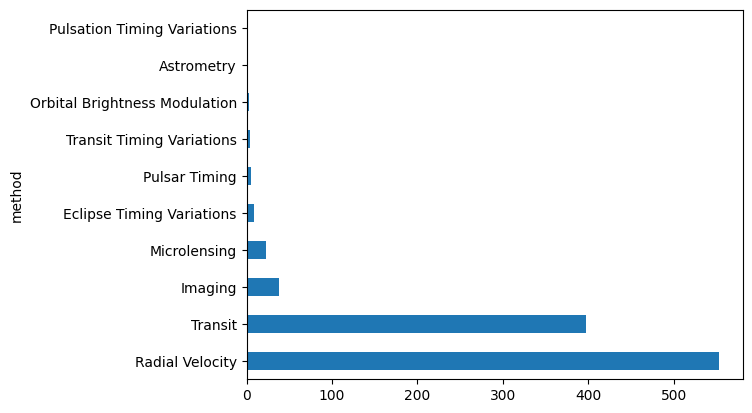

In [18]:
# Elimizdeki veri setini ufakca bir görselleştirelim.
df["method"].value_counts().plot.barh(); # ; üstteki gereksiz bilgiyi yok eder.

5 - Sürekli Değişken Özetleri

In [21]:
df_num = df.select_dtypes(include = ["float","int"])
df_num.head()

,number,orbital_period,mass,distance,year
0,1,269.300,7.10,77.40,2006
1,1,874.774,2.21,56.95,2008
2,1,763.000,2.60,19.84,2011
3,1,326.030,19.40,110.62,2007
4,1,516.220,10.50,119.47,2009


In [22]:
df_num.describe().T

,count,mean,std,min,25%,50%,75%,max
number,1035.0,1.785507,1.240976,1.000000,1.00000,1.0000,2.000,7.0
orbital_period,992.0,2002.917596,26014.728304,0.090706,5.44254,39.9795,526.005,730000.0
mass,513.0,2.638161,3.818617,0.003600,0.22900,1.2600,3.040,25.0
distance,808.0,264.069282,733.116493,1.350000,32.56000,55.2500,178.500,8500.0
year,1035.0,2009.070531,3.972567,1989.000000,2007.00000,2010.0000,2012.000,2014.0


In [24]:
# Biraz daha özelleştirelim ve "distance" kolonuna daha detaylı bakalım;
print("Distance kolonu için;")
print("Ortalama : " + str(df_num["distance"].mean()))
print("Dolu Değer Sayısı : " + str(df_num["distance"].count()))
print("Maksimum Değer : " + str(df_num["distance"].max()))
print("Minimum Değer : " + str(df_num["distance"].min()))
print("En Çok Tekrar Eden Değer : " + str(df_num["distance"].median()))
print("Standart Sapma : " + str(df_num["distance"].std()))

Distance kolonu için;
Ortalama : 264.06928217821786
Dolu Değer Sayısı : 808
Maksimum Değer : 8500.0
Minimum Değer : 1.35
En Çok Tekrar Eden Değer : 55.25
Standart Sapma : 733.1164929404421


6 - Veri Setinin Hikayesi

6.1 - Dağılım Grafikleri

In [9]:
# 6.1.1. Barplot
# Elimizdeki kategorik değişkenleri görselleştirmek için kullanılır.
diamonds = sns.load_dataset('diamonds')
df = diamonds.copy()
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [6]:
# Ordinal Tanımlama
from pandas.api.types import CategoricalDtype
df.cut = df.cut.astype(CategoricalDtype(ordered= True))
df.cut.head(1)

0    Ideal
Name: cut, dtype: category
Categories (5, object): ['Ideal' < 'Premium' < 'Very Good' < 'Good' < 'Fair']

In [7]:
# Yukarıda görüldüğü üzere sıralamayı yanlış yaptı bu yüzden aşağıdaki adımlara dikkat etmemiz gerekli.
cut_kategoriler = ["Fair","Good","Very Good","Premium","Ideal"] # Doğru sırayı oluşturduk ve aşağıda buna göre sıralandırmasını söyledik.
df.cut = df.cut.astype(CategoricalDtype(categories=cut_kategoriler, ordered=True))
df.cut.head(1)

0    Ideal
Name: cut, dtype: category
Categories (5, object): ['Fair' < 'Good' < 'Very Good' < 'Premium' < 'Ideal']

Text(0.5, 1.0, 'Cut Değişkeninin Sınıf Frekansları')

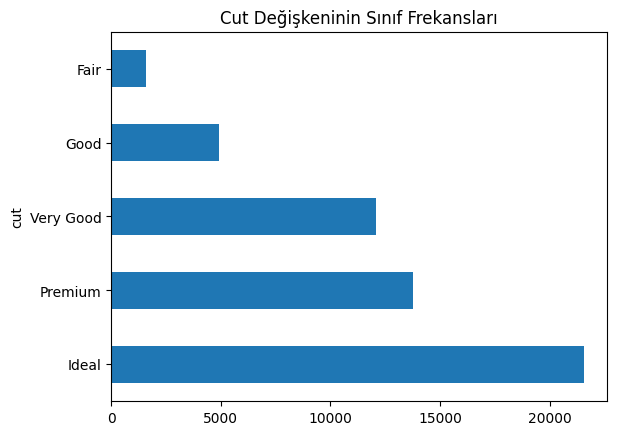

In [9]:
# Kodun okunaklı olması ve gerektiğinde gerekli yerlere notlar alınabilmesi için aşağıdaki gibi ekstra paranteze alarak yazmak daha faydalı olacaktır.
(df["cut"]
 .value_counts()
 .plot.barh() 
 .set_title("Cut Değişkeninin Sınıf Frekansları")) # Başlık ekler.

<Axes: xlabel='cut', ylabel='count'>

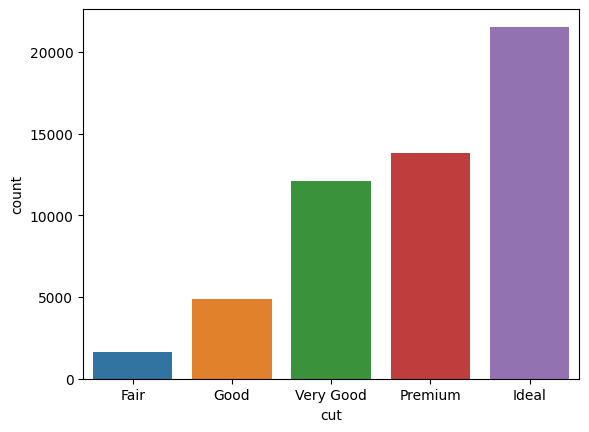

In [15]:
(sns.barplot(
    x=df.cut.value_counts().index, # index bize değişkenlerin isimlerini verir.
    y=df.cut.value_counts(), # indexsin bu halde ise direkt adetlerini verir.
    data=df))

c:\Users\kerem\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


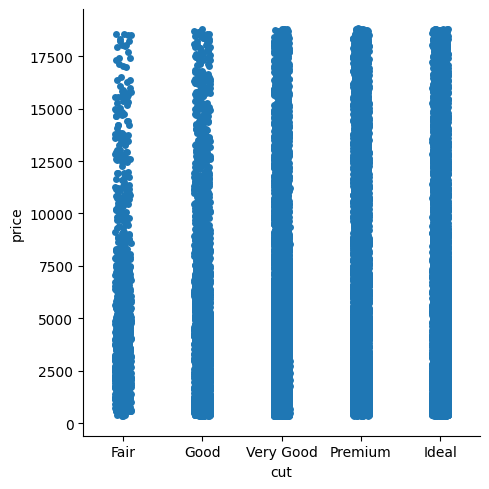

In [25]:
# Sütunları birbirleriyle çaprazlayıp, karşılaştırabiliriz.
(sns.catplot(x= "cut",
             y= "price",
             #hue = "color", # Okunaklı olmuyor.
             data = df));

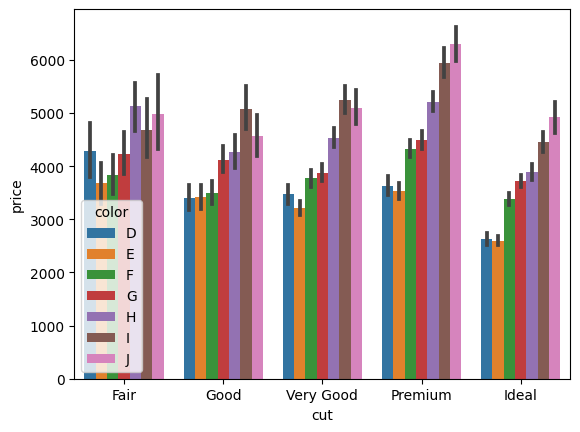

In [23]:
# Yukarıdaki grafiği biraz daha detaylı incelemek istersek
(sns.barplot(x= "cut",
             y= "price",
             hue = "color", # Görseli 3 boyutlu hale getiriyoruz aslında. 3. Bir boyut ekliyoruz.
             data = df));
# Her bir barın üstündeki ince siyah çubuklar standart sapmayı (hata payını) gösterir.

In [26]:
# Görselimizi doğrulayalım (Çok önemli bir adımdır!)
df.groupby(["cut","color"])["price"].mean()

cut        color
Fair       D        4291.061350
           E        3682.312500
           F        3827.003205
           G        4239.254777
           H        5135.683168
           I        4685.445714
           J        4975.655462
Good       D        3405.382175
           E        3423.644159
           F        3495.750275
           G        4123.482204
           H        4276.254986
           I        5078.532567
           J        4574.172638
Very Good  D        3470.467284
           E        3214.652083
           F        3778.820240
           G        3872.753806
           H        4535.390351
           I        5255.879568
           J        5103.513274
Premium    D        3631.292576
           E        3538.914420
           F        4324.890176
           G        4500.742134
           H        5216.706780
           I        5946.180672
           J        6294.591584
Ideal      D        2629.094566
           E        2597.550090
           F        337

In [5]:
# 6.1.2. Histogram ve Yoğunluk Grafikleri
# Sayısal değişkenlerin dağılımını görselleştirmek için kullanılır.
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


c:\Users\kerem\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


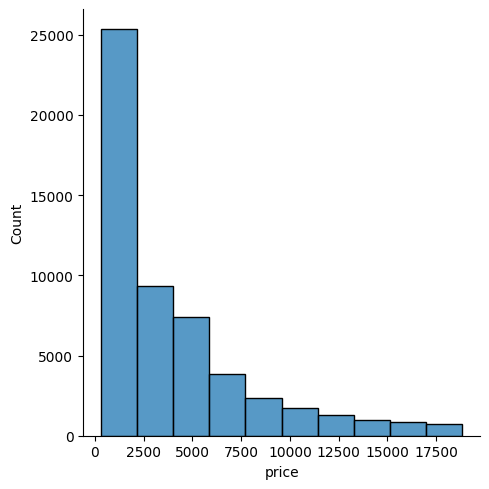

In [14]:
(sns.displot(df.price,
             bins= 10, # Kaç sütun ile gösterileceğini seçmemizi sağlar.
             kde = False)); # Yoğunluk grafiğini istemiyorum. Onu altta ayrı ele alacağım.

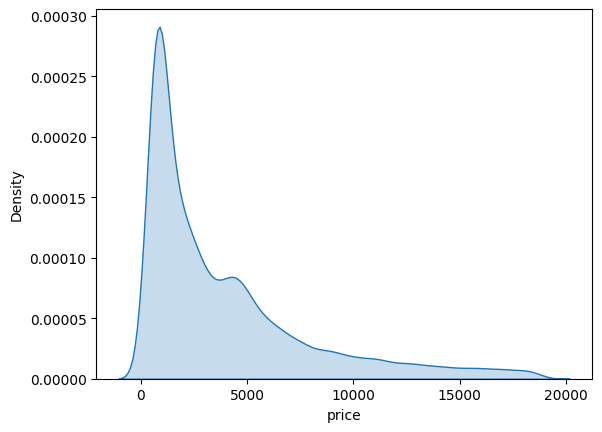

In [17]:
(sns.kdeplot(df.price,
             fill= True)); # Çizginin altını boyar. Daha iyi görsellik için.

c:\Users\kerem\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


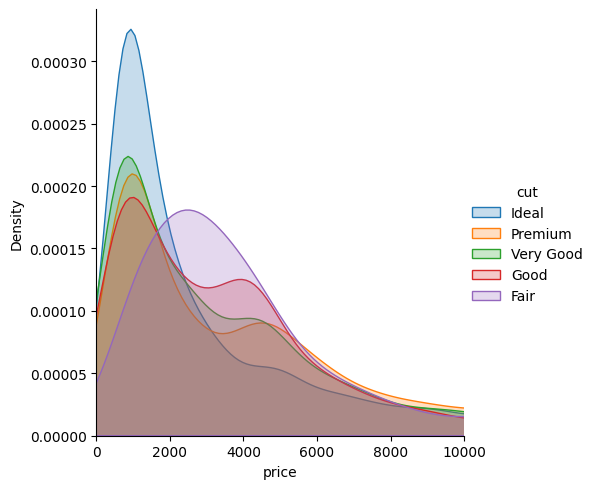

In [19]:
# Sütunları birbirleriyle çaprazlayıp, karşılaştıralım.
(sns.FacetGrid(df,
               hue= "cut",
               height= 5,
               xlim= (0,10000), # x ekseninin limitini belirler. 0 ile 1000 arasını inceleyeceğiz.
               ).map(sns.kdeplot, "price", fill= True) # price ile cut sınıfını çaprazlamamı sağlar. Price 'a göre cut sınıfını getirir.
               .add_legend());

c:\Users\kerem\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


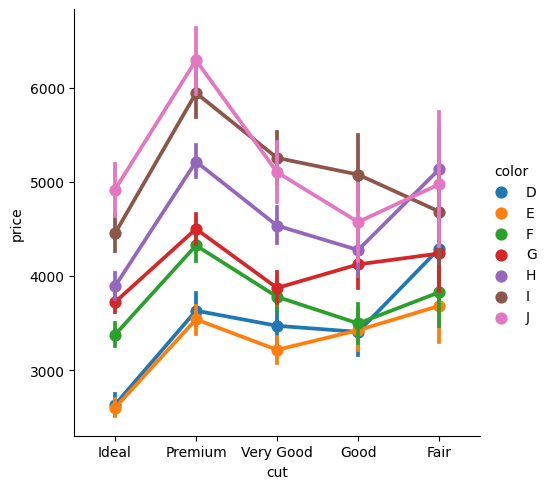

In [20]:
(sns.catplot(x= "cut",
             y= "price",
             hue= "color",
             kind= "point",
             data = df));